<a href="https://colab.research.google.com/github/mbuitragoc/MetNumUN2023I/blob/main/lab9/Group8_Taylor_ln_x_plus_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taylor series of $e^x$

$$ 
\begin{array}{lll}
e^{ x}  & =  & \sum_{i=0}^{\infty} \frac{x^i}{i!} \\
        & = & 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} +\cdots+ \frac{x^n}{n!} + \cdots  \\
       & = & 1 + x + \frac{x^2}{2!} +  \frac{x^3}{3!}  \cdots+ \frac{x^n}{n!} + O(x^{n+1}) 
\end{array} 
$$


Approximation 
$$ e^{ x}  \approx 1 + x + \frac{x^2}{2!} + + \frac{x^3}{3!}  + \cdots+ \frac{x^n}{n!}$$


Animate code in Sagemath for $ln(x+1)$

1.   Elemento de lista
2.   Elemento de lista


```python
# Animate  Taylor Series of $$f(x) = ln(x+1)$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = ln(x+1)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('lnx+1.gif')
```

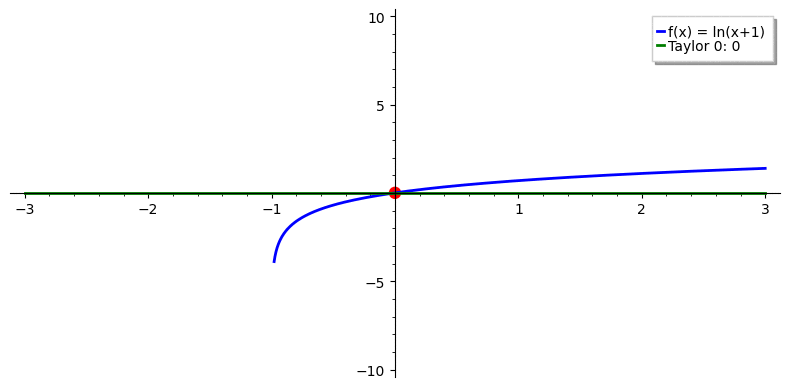

```python
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = ln(x+1)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -2,4, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5,9)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(48)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('lnx+1(2).gif')
```

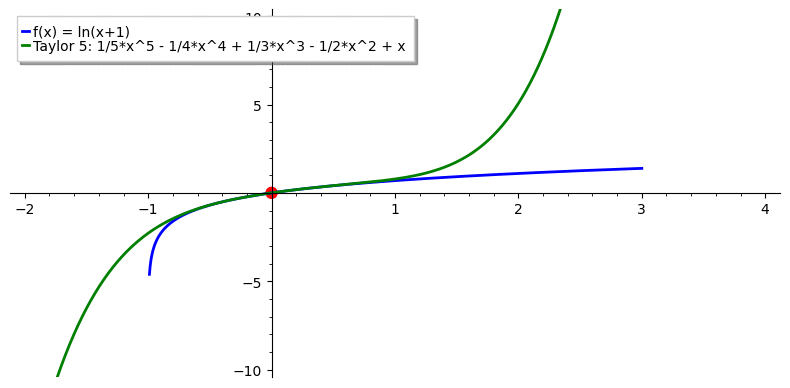


#What is value of the partial Taylor series of $ln(x+1)$ up to the  $n$-th term of $ln(x+1)$ about $0$ (Maclaurin  series) for $x=0.2$

$$ ln(x+1) \approx \sum_{i=1}^{n} (-1)^{i-1}\frac{x^{i}}{i}  = ln(x+1) - \frac{x^2}{2}+ \frac{x^4}{4} +\cdots+ (-1)^{n-1}\frac{x^{n}}{n}$$

Because (n−1)!/n!=1/n

In [51]:
# ∑_{i=1}^n  [(-1)^(i-1)][(x^i/i)]
import math

n = 10
x = 0.2
ln_x = 0.0
for i in range(1, n+1):
    ln_x += ((-1)**(i-1))*(x**i/(i))
    print('ln_of_x+1 ≈ ∑_{i=1}^'+str(i),'-1^'+str(i-1)+'*(x^'+str(i)+'/'+str(i)+') =',ln_x, )  
print('ln(x+1) = ',math.log(x+1))

ln_of_x+1 ≈ ∑_{i=1}^1 -1^0*(x^1/1) = 0.2
ln_of_x+1 ≈ ∑_{i=1}^2 -1^1*(x^2/2) = 0.18
ln_of_x+1 ≈ ∑_{i=1}^3 -1^2*(x^3/3) = 0.18266666666666667
ln_of_x+1 ≈ ∑_{i=1}^4 -1^3*(x^4/4) = 0.18226666666666666
ln_of_x+1 ≈ ∑_{i=1}^5 -1^4*(x^5/5) = 0.18233066666666667
ln_of_x+1 ≈ ∑_{i=1}^6 -1^5*(x^6/6) = 0.18232
ln_of_x+1 ≈ ∑_{i=1}^7 -1^6*(x^7/7) = 0.1823218285714286
ln_of_x+1 ≈ ∑_{i=1}^8 -1^7*(x^8/8) = 0.1823215085714286
ln_of_x+1 ≈ ∑_{i=1}^9 -1^8*(x^9/9) = 0.18232156546031747
ln_of_x+1 ≈ ∑_{i=1}^10 -1^9*(x^10/10) = 0.18232155522031748
ln(x+1) =  0.1823215567939546


# What is the minimun $n$ for which the $n+1$-th term of the Taylor series for $ln(x+1)$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n+1}}{(n+1)}\right| < \epsilon$$


In [54]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]
import math

x = 0.2
epsilon = 10**(-6)
delta = 1
ln_x_1 = 0
i = 1
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^(i-1)][(x^i/i)]".center(21)," ","|x^n/n|".center(20)," ","epsilon".center(20))
while  epsilon <= abs(delta):
  delta = ((-1)**(i-1))*(x**i/(i))
  ln_x_1 += delta
  if i < 100 or i > 99900:
    print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format( abs(delta), '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1)
print('x = ',x)
print('ln(x+1) ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_x_1)    
print('ln(x+1) = ',math.log(x+1))

         n   ∑_{i=1}^n  [(-1)^(i-1)][(x^i/i)]         |x^n/n|                epsilon       
         1    0.20000000000000001    0.20000000000000001    0.00000100000000000
         2    0.17999999999999999    0.02000000000000000    0.00000100000000000
         3    0.18266666666666667    0.00266666666666667    0.00000100000000000
         4    0.18226666666666666    0.00040000000000000    0.00000100000000000
         5    0.18233066666666667    0.00006400000000000    0.00000100000000000
         6    0.18232000000000001    0.00001066666666667    0.00000100000000000
         7    0.18232182857142859    0.00000182857142857    0.00000100000000000
         8    0.18232150857142859    0.00000032000000000    0.00000100000000000
n =  8
x =  0.2
ln(x+1) ≈ ∑_{i=1}^8 [(-1)^(i-1)][(x^i/i)] = 0.1823215085714286
ln(x+1) =  0.1823215567939546


In [55]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]
import math

x = -0.2
epsilon = 10**(-6)
delta = 1
ln_x_1 = 0
i = 1
print("n".rjust(10)," ","∑_{i=1}^n  [(-1)^(i-1)][(x^i/i)]".center(21)," ","|x^n/n|".center(20)," ","epsilon".center(20))
while  epsilon <= abs(delta):
  delta = ((-1)**(i-1))*(x**i/(i))
  ln_x_1 += delta
  if i < 100 or i > 99900:
    print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format( abs(delta), '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1)
print('x = ',x)
print('ln(x+1) ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_x_1)    
print('ln(x+1) = ',math.log(x+1))

         n   ∑_{i=1}^n  [(-1)^(i-1)][(x^i/i)]         |x^n/n|                epsilon       
         1    -0.20000000000000001    0.20000000000000001    0.00000100000000000
         2    -0.22000000000000003    0.02000000000000000    0.00000100000000000
         3    -0.22266666666666671    0.00266666666666667    0.00000100000000000
         4    -0.22306666666666672    0.00040000000000000    0.00000100000000000
         5    -0.22313066666666673    0.00006400000000000    0.00000100000000000
         6    -0.22314133333333339    0.00001066666666667    0.00000100000000000
         7    -0.22314316190476197    0.00000182857142857    0.00000100000000000
         8    -0.22314348190476196    0.00000032000000000    0.00000100000000000
n =  8
x =  -0.2
ln(x+1) ≈ ∑_{i=1}^8 [(-1)^(i-1)][(x^i/i)] = -0.22314348190476196
ln(x+1) =  -0.2231435513142097


#What is the minimun $n$ for which the error using the Lagrange's formula of the Residual $E_n$ of the Taylos series for $ln(x+1)$ about $0$ (Maclaurin  series), is less than  $\epsilon$.
 

In [56]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]|
import math

x = 0.1
epsilon = 10**(-8)
ln_x_1 = 0
i = 1
error = x**(i+1) / ((i+1)*(x+1)**(i+1))
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  ln_x_1 +=  ((-1)**(i-1))*(x**i/(i))
  error = x**(i+1) / ((i+1)*(x+1)**(i+1))
  
  print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('ln_x_1 ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_x_1)    
print('ln(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         1    0.00000000000000000    0.00413223140495868    0.00000001000000000
         1    0.10000000000000001    0.00413223140495868    0.00000001000000000
         2    0.09500000000000000    0.00025043826696719    0.00000001000000000
         3    0.09533333333333334    0.00001707533638413    0.00000001000000000
         4    0.09530833333333334    0.00000124184264612    0.00000001000000000
         5    0.09531033333333334    0.00000009407898834    0.00000001000000000
         6    0.09531016666666668    0.00000000733083026    0.00000001000000000
n =  6
x =  0.1
ln_x_1 ≈ ∑_{i=1}^6 [(-1)^(i-1)][(x^i/i)] = 0.09531016666666668
ln(x+1) =  0.09531017980432493


In [57]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]|
import math

x = -0.1 ## su magnitud debe ser menor a 0.5 puesto que la division podria diverger a un numero muy grande
epsilon = 10**(-8)
ln_x_1 = 0
i = 1
error = x**(i+1) / ((i+1)*(x+1)**(i+1))
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  ln_x_1 +=  ((-1)**(i-1))*(x**i/(i))
  error = x**(i+1) / ((i+1)*(x+1)**(i+1))
  
  print(format(i, '10'),"  ", format(ln_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('ln_x_1 ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_x_1)    
print('ln(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         1    0.00000000000000000    0.00617283950617284    0.00000001000000000
         1    -0.10000000000000001    0.00617283950617284    0.00000001000000000
         2    -0.10500000000000001    -0.00045724737082762    0.00000001000000000
         3    -0.10533333333333335    0.00003810394756897    0.00000001000000000
         4    -0.10535833333333335    -0.00000338701756169    0.00000001000000000
         5    -0.10536033333333335    0.00000031361273719    0.00000001000000000
         6    -0.10536050000000001    -0.00000002986787973    0.00000001000000000
         7    -0.10536051428571430    0.00000000290382164    0.00000001000000000
n =  7
x =  -0.1
ln_x_1 ≈ ∑_{i=1}^7 [(-1)^(i-1)][(x^i/i)] = -0.1053605142857143
ln(x+1) =  -0.10536051565782628


<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>

* If $x \le 0$ then $f(n+1)(ξ)= e^ξ < e^0  = 1$ for any $x \le \xi < 0$ then 

$$ \left|E_n =\right| = \left|\frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \right| = \left|\frac{e^\xi}{(n+1)!}x^{(n+1)} \right| \le  \left|\frac{1}{(n+1)!}x^{(n+1)}\right| $$

<center>
<img src = "https://raw.githubusercontent.com/gjhernandezp/NM/main/Taylor%20Series/e_to_minus_epsilon.png" alt = "e_to_minus_epsilon.png]">  </img>
</center>



# Error using the Lagrange's formula of the Residual $E_n$

For the Taylor series for $f(x) = sin(x)$ about $c=0$ (Maclaurin) 

Se tiene que la derivada $n+1$ de $sin(x) $ es $f^{(n+1)}(x) = sin(x+\frac{(n+1)\pi}{2})$, entonces el error usado es:

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} = \frac{sin(x+\frac{(n+1)\pi}{2})}{(n+1)!}x^{n+1} $$

En valor absoluto puesto que solo se necesita su magnitud:

$$ \left|\frac{sin(x+\frac{(n+1)\pi}{2})}{(n+1)!}x^{n+1}\right| $$

#  Sympy

In [66]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp, log
from sympy.plotting import plot
import matplotlib.pyplot as plt
import math

In [67]:
# Define symbol
x = Symbol('x')

In [70]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [71]:
print('ln(x+1) ≅', taylor(log((x+1), math.e), 0, 4))

ln(x+1) ≅ 0.333333333333333*x**3 - 0.5*x**2 + 1.0*x


In [72]:
print('ln(2) =', taylor(log(x+1), 0, 4).subs(x,1))

ln(2) = 5/6


In [74]:
print('Taylor 0 ln(x+1) ≅', taylor(log(x+1), 0, 0))
print('Taylor 1 ln(x+1) ≅', taylor(log(x+1), 0, 1))
print('Taylor 2 ln(x+1) ≅', taylor(log(x+1), 0, 2))
print('Taylor 3 ln(x+1) ≅', taylor(log(x+1), 0, 3))
print('Taylor 4 ln(x+1) ≅', taylor(log(x+1), 0, 4))
print('Taylor 5 ln(x+1) ≅', taylor(log(x+1), 0, 5))
print('Taylor 6 ln(x+1) ≅', taylor(log(x+1), 0, 6))
print('Taylor 7 ln(x+1) ≅', taylor(log(x+1), 0, 7))
print('Taylor 8 ln(x+1) ≅', taylor(log(x+1), 0, 8))

Taylor 0 ln(x+1) ≅ 0
Taylor 1 ln(x+1) ≅ 0
Taylor 2 ln(x+1) ≅ x
Taylor 3 ln(x+1) ≅ -x**2/2 + x
Taylor 4 ln(x+1) ≅ x**3/3 - x**2/2 + x
Taylor 5 ln(x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 ln(x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 ln(x+1) ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 ln(x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [75]:
print('Taylor 0 ln(x+1) ≅', taylor(log(x+1), 0, 0).subs(x+1,2),' = ',taylor(log(x+1), 0, 0).subs(x+1,2).evalf())
print('Taylor 1 ln(x+1) ≅', taylor(log(x+1), 0, 1).subs(x+1,2),' = ',taylor(log(x+1), 0, 1).subs(x+1,2).evalf())
print('Taylor 2 ln(x+1) ≅', taylor(log(x+1), 0, 2).subs(x+1,2),' = ',taylor(log(x+1), 0, 2).subs(x+1,2).evalf())
print('Taylor 3 ln(x+1) ≅', taylor(log(x+1), 0, 3).subs(x+1,2),' = ',taylor(log(x+1), 0, 3).subs(x+1,2).evalf())
print('Taylor 4 ln(x+1) ≅', taylor(log(x+1), 0, 4).subs(x+1,2),' = ',taylor(log(x+1), 0, 4).subs(x+1,2).evalf())
print('Taylor 5 ln(x+1) ≅', taylor(log(x+1), 0, 5).subs(x+1,2),' = ',taylor(log(x+1), 0, 5).subs(x+1,2).evalf())
print('Taylor 6 ln(x+1) ≅', taylor(log(x+1), 0, 6).subs(x+1,2),' = ',taylor(log(x+1), 0, 6).subs(x+1,2).evalf())
print('Taylor 7 ln(x+1) ≅', taylor(log(x+1), 0, 8).subs(x+1,2),' = ',taylor(log(x+1), 0, 7).subs(x+1,2).evalf())

Taylor 0 ln(x+1) ≅ 0  =  0
Taylor 1 ln(x+1) ≅ 0  =  0
Taylor 2 ln(x+1) ≅ x  =  x
Taylor 3 ln(x+1) ≅ 1 - x**2/2  =  1.0 - 0.5*x**2
Taylor 4 ln(x+1) ≅ x**3/3 - x**2/2 + 1  =  0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 5 ln(x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + 1  =  -0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 6 ln(x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 7 ln(x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  -0.166666666666667*x**6 + 0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0


<ipython-input-82-0006bc284c8b>:6: RuntimeWarning: invalid value encountered in log
  p_log = np.log(values+1)


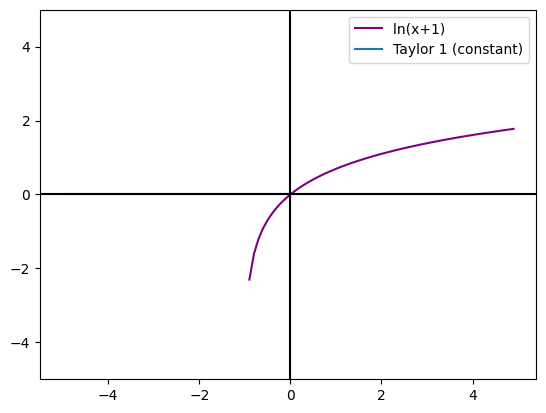

In [82]:
import math
import numpy as np
import matplotlib.pyplot as plt

values = np.arange(-5,5,0.1)
p_log = np.log(values+1)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 1 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='purple')
ax.plot(values,t_log1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

<ipython-input-87-991b2bd0195a>:5: RuntimeWarning: invalid value encountered in log
  p_log = np.log(values+1)


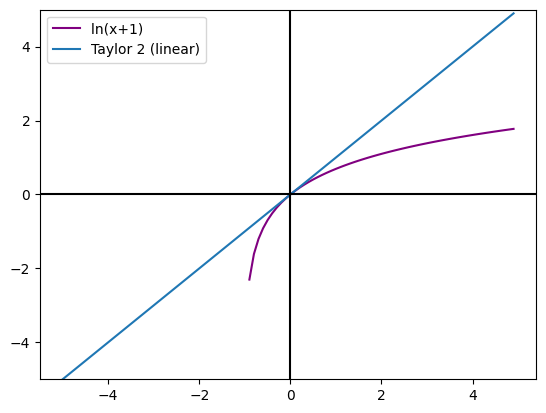

In [87]:
import math
import numpy as np
import matplotlib.pyplot as plt
values = np.arange(-5,5,0.1)
p_log = np.log(values+1)
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 2 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='purple')
ax.plot(values,t_log2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

<ipython-input-86-f1a68b753ccb>:2: RuntimeWarning: invalid value encountered in log
  p_log = np.log(values+1)


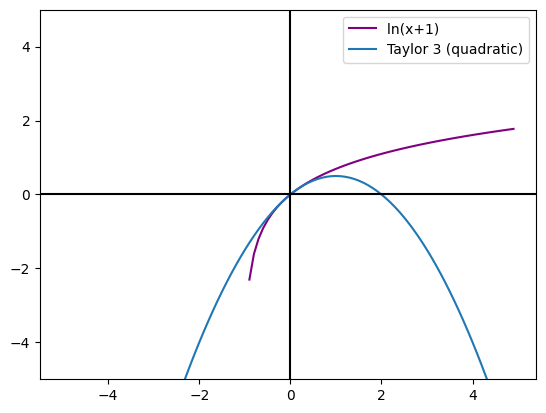

In [86]:
values = np.arange(-5,5,0.1)
p_log = np.log(values+1)
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 3 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='purple')
ax.plot(values,t_log3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

<ipython-input-92-d25941ddfe56>:2: RuntimeWarning: invalid value encountered in log
  p_log = np.log(values+1)


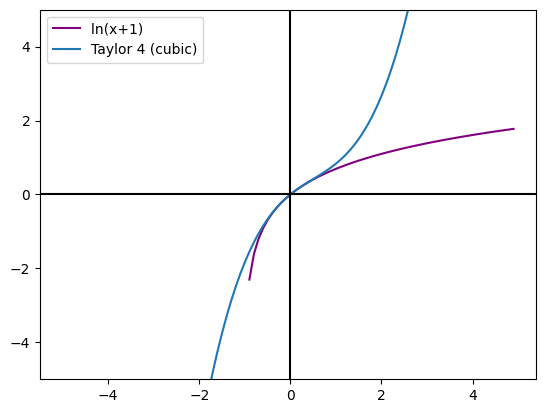

In [92]:
values = np.arange(-5,5,0.1)
p_log = np.log(values+1)
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='purple')
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

<ipython-input-93-53a381da04b3>:2: RuntimeWarning: invalid value encountered in log
  p_log = np.log(values+1)


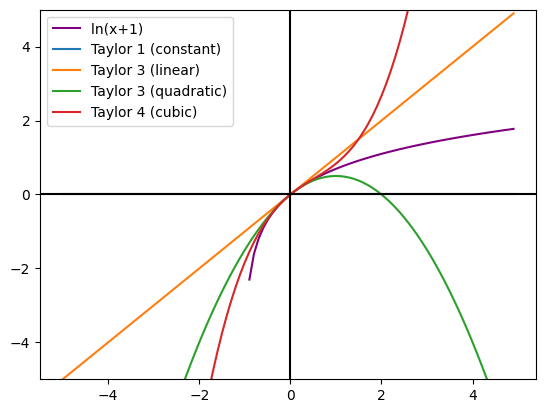

In [93]:
values = np.arange(-5,5,0.1)
p_log = np.log(values+1)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['ln(x+1) ','Taylor 1 (constant)','Taylor 3 (linear)','Taylor 3 (quadratic)','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='purple')
ax.plot(values,t_log1)
ax.plot(values,t_log2)
ax.plot(values,t_log3)
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()